In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Generative Model

<img src="images/image9.png" width="600" height="400" />  <img src="images/image10.png" width="600" height="400" />

In [2]:
# function to simulate weights of individuals from height

def simulate_weights(H, b, sd):
    # Generating a random normal distribution 'U' with mean 0 and standard deviation 'sd'
    # The size of 'U' is the same as the size of 'h'
    U = np.random.normal(0, sd, len(H))
    
    # Calculating 'W' by multiplying 'b' with 'h' and adding 'U'
    W = b * H + U
    
    # Returning the calculated weights 'W'
    return W

### Order
<img src="images/image17.png" width="400" height="250" />

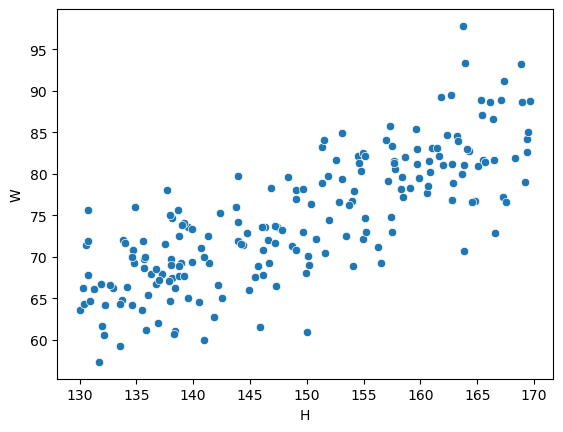

In [3]:
# This function generates random values from a uniform distribution within the specified range (low, high) and size (size)
H = np.random.uniform(low=130, high=170, size=200)
W = simulate_weights(H, b=0.5, sd=5)

sns.scatterplot(x=H, y=W)
plt.xlabel("H")
plt.ylabel("W")
plt.show()

## Quadratic Approximation

In [4]:
import pymc as pm
warnings.filterwarnings('ignore', category=DeprecationWarning)

with pm.Model() as model:
    # Defining the prior for the intercept 'a' using a Normal distribution
    a = pm.Normal('a', mu=0, sigma=10)
    
    # Defining the prior for the slope 'b' using a Uniform distribution
    b = pm.Uniform('b', lower=0, upper=1)
    
    # Defining the prior for the standard deviation 'sigma' using a Uniform distribution
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Defining the expected value 'mu' as a linear function of 'H'
    mu = a + b * H
    
    # Defining the likelihood of the data 'W' using a Normal distribution

    W_obs = pm.Normal('W_obs', mu=mu, sigma=sigma, observed=W)
    print(model)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Prior Predictive Distribution

<img src="images/image27.png" width="800" height="400" />

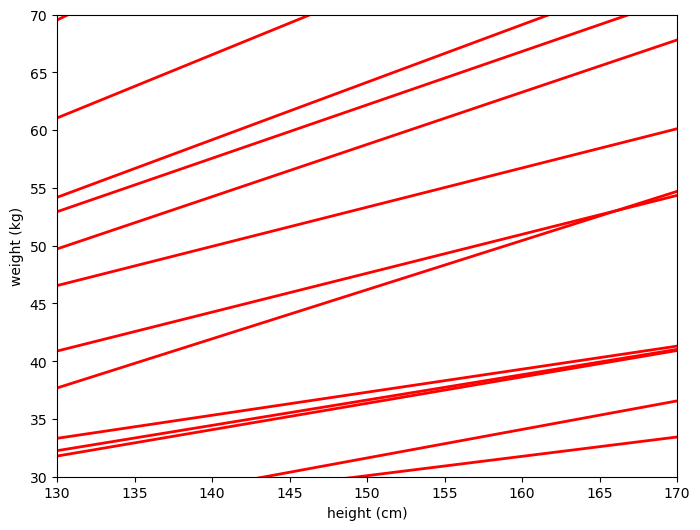

In [5]:
np.random.seed(42)

# Define the number of samples
n = int(1e3)

# Generate random data
a = np.random.normal(0, 10, n)
b = np.random.uniform(0, 1, n)

# Create the plot
plt.figure(figsize=(8, 6))
plt.xlim(130, 170)
plt.ylim(30, 70)
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# Plot multiple lines
for j in range(50):
    plt.plot([130, 170], [a[j] + b[j] * 130, a[j] + b[j] * 170], lw=2, color='red')

plt.show()


<img src="images/image28.png" width="600" height="300" />

## Validate Model

<img src="images/image30.png" width="800" height="400" />

In [6]:
H = np.random.uniform(130, 170, 10)
W = simulate_weights(H, b=0.5, sd=5)

with pm.Model() as model:
    # Defining the prior for the intercept 'a' using a Normal distribution
    a = pm.Normal('a', mu=0, sigma=10)
    
    # Defining the prior for the slope 'b' using a Uniform distribution
    b = pm.Uniform('b', lower=0, upper=1)
    
    # Defining the prior for the standard deviation 'sigma' using a Uniform distribution
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Defining the expected value 'mu' as a linear function of 'H'
    mu = a + b * H
    
    # Defining the likelihood of the data 'W' using a Normal distribution
    W_obs = pm.Normal('W_obs', mu=mu, sigma=sigma, observed=W)

    trace = pm.sample(1000, nuts_sampler="numpyro")

pm.summary(trace).round(2)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-2.23,9.31,-18.50,17.09,0.31,0.24,890.0,1112.0,1.01
b,0.51,0.06,0.39,0.63,0.00,0.00,863.0,1069.0,1.01
sigma,5.73,1.47,3.46,8.82,0.06,0.04,809.0,677.0,1.01


<img src="images/image32.png" width="800" height="400" />

In [7]:
data = pd.read_csv("../data/Howell1.csv", sep=";")
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [8]:
H = data["height"]
W = data["weight"]

with pm.Model() as model:
    # Defining the prior for the intercept 'a' using a Normal distribution
    a = pm.Normal('a', mu=0, sigma=10)
    
    # Defining the prior for the slope 'b' using a Uniform distribution
    b = pm.Uniform('b', lower=0, upper=1)
    
    # Defining the prior for the standard deviation 'sigma' using a Uniform distribution
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # Defining the expected value 'mu' as a linear function of 'H'
    mu = a + b * H
    
    # Defining the likelihood of the data 'W' using a Normal distribution
    W_obs = pm.Normal('W_obs', mu=mu, sigma=sigma, observed=W)

    trace = pm.sample(1000, nuts_sampler="numpyro")

pm.summary(trace).round(2)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-33.42,1.07,-35.40,-31.30,0.03,0.02,1335.0,1418.0,1.0
b,0.50,0.01,0.48,0.51,0.00,0.00,1330.0,1428.0,1.0
sigma,5.00,0.15,4.73,5.28,0.00,0.00,1729.0,1768.0,1.0


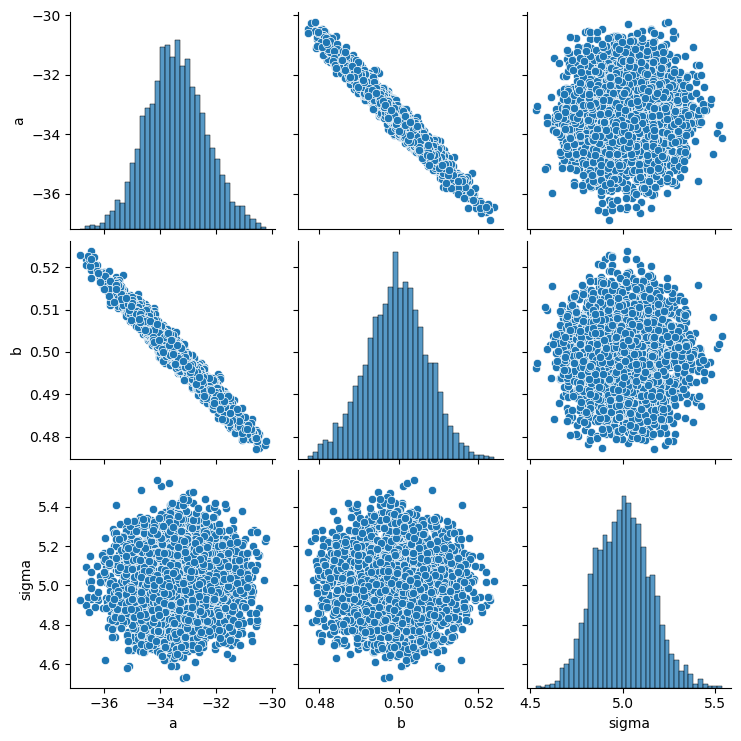

In [9]:
df_trace = trace.posterior.to_dataframe().reset_index()
df_trace.to_csv("../data/howell1_trace.csv", index=False)
df_trace_selected = df_trace[["a", "b", "sigma"]]
sns.pairplot(df_trace_selected)
plt.show()

<img src="images/post_sample.png" width="600" height="300" /> 

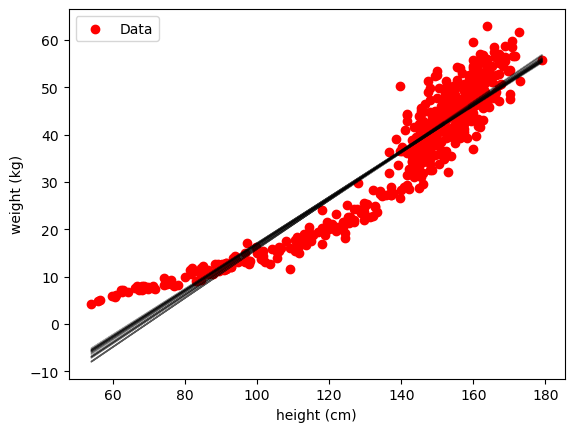

In [10]:
# Extract the intercept (a) and slope (b) from the trace
a_samples = df_trace['a']
b_samples = df_trace['b']

# Plot the data points
plt.scatter(data['height'], data['weight'], color='red', label='Data')
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')

# Plot multiple regression lines sampled from the posterior
for i in range(20):
    plt.plot(data['height'], a_samples[i] + b_samples[i] * data['height'], 
             color='black', alpha=0.3, linewidth=1)

plt.legend()
plt.show()

<img src="images/all_plots.png" width="600" height="300" />

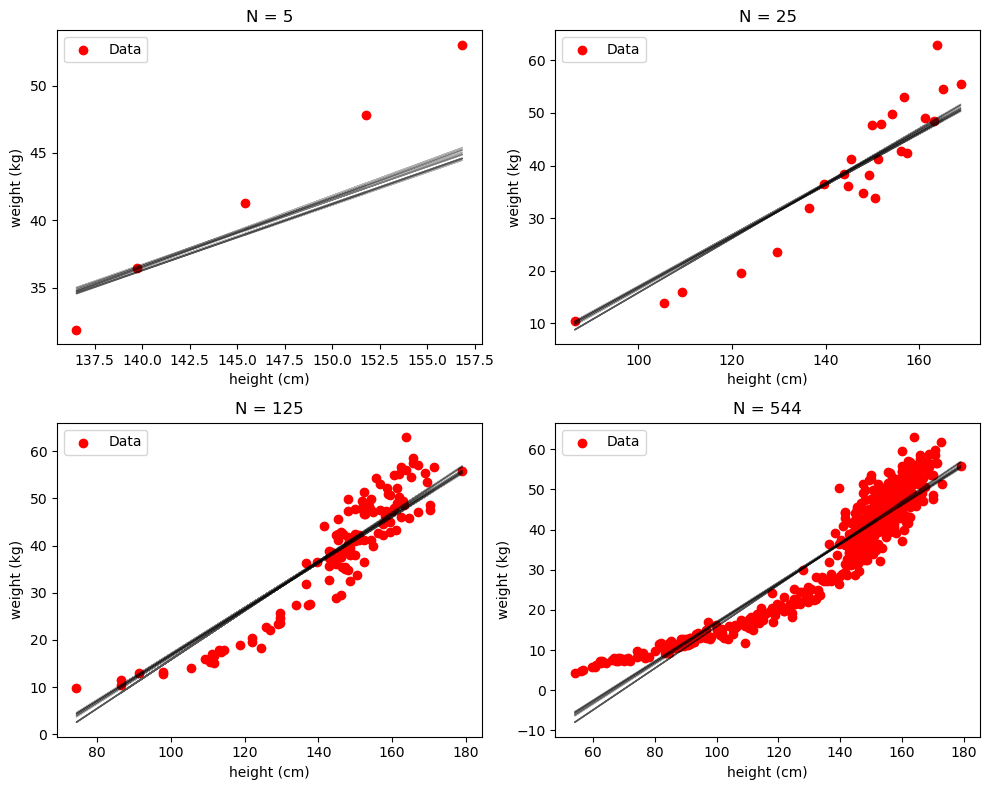

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i in range(4):
    ax = axs[i//2, i%2]
    
    # Extract the intercept (a) and slope (b) from the trace
    a_samples = df_trace['a']
    b_samples = df_trace['b']
    
    s_data = data[:5**(i+1)]

    # Plot the data points
    ax.scatter(s_data['height'], s_data['weight'], color='red', label='Data')
    ax.set_xlabel('height (cm)')
    ax.set_ylabel('weight (kg)')

    # Plot multiple regression lines sampled from the posterior
    for j in range(10):
        ax.plot(s_data['height'], a_samples[j] + b_samples[j] * s_data['height'], 
                color='black', alpha=0.3, linewidth=1)
    
    ax.set_title(f"N = {len(s_data)}")
    ax.legend()

plt.tight_layout()
plt.show()